Hi everyone!

In this notebook, we will practice working with an API. The API we will connect to is The Movie Database (TMDB). To start,
please create a free account at https://www.themoviedb.org

Then go to https://www.themoviedb.org/settings/api and get your unique API key. You will use this key to send queries.

In [1]:
import pandas as pd
import requests # for sending requests to an API, pip install if you don't have it

In [2]:
# store your API key, which you get from the website after registration
apiKey = "72c5856c4f89b7605c70f7fd798f3f7c"

Every API has its own query syntax. So you should always read the help documents posted on the API's website. For TMDB's, go to https://developer.themoviedb.org/docs and familiarize yourself with the API.

In this notebook, we will use the "discover" module of TMDB: https://developer.themoviedb.org/reference/discover-movie Notice it gives you "query parameters" that we can use. For example, we can run the query below which returns movies released in 2023; sorted in descending order by average imdb score (which is voted by the users); with at least 1,000 votes.

In [3]:
url = "https://api.themoviedb.org/3/discover/movie?api_key="+apiKey+\
"&primary_release_year=2023&sort_by=vote_average.desc&vote_count.gte=1000"

In [4]:
# this is how to request the query to be processed. Notice the output is json.
out = requests.get(url).json()

In [5]:
out

{'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/4HodYYKEIsGOdinkGi2Ucz6X9i0.jpg',
   'genre_ids': [16, 28, 12, 878],
   'id': 569094,
   'original_language': 'en',
   'original_title': 'Spider-Man: Across the Spider-Verse',
   'overview': 'After reuniting with Gwen Stacy, Brooklyn’s full-time, friendly neighborhood Spider-Man is catapulted across the Multiverse, where he encounters the Spider Society, a team of Spider-People charged with protecting the Multiverse’s very existence. But when the heroes clash on how to handle a new threat, Miles finds himself pitted against the other Spiders and must set out on his own to save those he loves most.',
   'popularity': 371.771,
   'poster_path': '/8Vt6mWEReuy4Of61Lnj5Xj704m8.jpg',
   'release_date': '2023-05-31',
   'title': 'Spider-Man: Across the Spider-Verse',
   'video': False,
   'vote_average': 8.4,
   'vote_count': 5064},
  {'adult': False,
   'backdrop_path': '/fm6KqXpk3M2HVveHwCrBSSBaO0V.jpg',
   'genre_ids': [18, 36

In [6]:
# since this is json, we can check its parent nodes via list()
list(out)

['page', 'results', 'total_pages', 'total_results']

In [7]:
# finally, if we want to convert it to a pandas dataframe, we can use from_dict() from pandas for the results node:
pd.DataFrame.from_dict(out['results'])

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/4HodYYKEIsGOdinkGi2Ucz6X9i0.jpg,"[16, 28, 12, 878]",569094,en,Spider-Man: Across the Spider-Verse,"After reuniting with Gwen Stacy, Brooklyn’s fu...",371.771,/8Vt6mWEReuy4Of61Lnj5Xj704m8.jpg,2023-05-31,Spider-Man: Across the Spider-Verse,False,8.4,5064
1,False,/fm6KqXpk3M2HVveHwCrBSSBaO0V.jpg,"[18, 36]",872585,en,Oppenheimer,The story of J. Robert Oppenheimer's role in t...,1117.946,/8Gxv8gSFCU0XGDykEGv7zR1n2ua.jpg,2023-07-19,Oppenheimer,False,8.1,5159
2,False,/lntyt4OVDbcxA1l7LtwITbrD3FI.jpg,"[18, 10749]",1010581,es,Culpa mía,"Noah must leave her city, boyfriend, and frien...",313.789,/w46Vw536HwNnEzOa7J24YH9DPRS.jpg,2023-06-08,My Fault,False,8.1,1981
3,False,/pA3vdhadJPxF5GA1uo8OPTiNQDT.jpg,"[28, 18]",678512,en,Sound of Freedom,"The story of Tim Ballard, a former US governme...",299.350,/qA5kPYZA7FkVvqcEfJRoOy4kpHg.jpg,2023-07-03,Sound of Freedom,False,8.1,1563
4,False,/5YZbUmjbMa3ClvSW1Wj3D6XGolb.jpg,"[878, 12, 28]",447365,en,Guardians of the Galaxy Vol. 3,"Peter Quill, still reeling from the loss of Ga...",282.283,/r2J02Z2OpNTctfOSN1Ydgii51I3.jpg,2023-05-03,Guardians of the Galaxy Vol. 3,False,8.0,5414
5,False,/r7DuyYJ0N3cD8bRKsR5Ygq2P7oa.jpg,"[12, 28, 18]",980489,en,Gran Turismo,The ultimate wish-fulfillment tale of a teenag...,373.386,/51tqzRtKMMZEYUpSYkrUE7v9ehm.jpg,2023-08-09,Gran Turismo,False,8.0,1553
6,False,/t5zCBSB5xMDKcDqe91qahCOUYVV.jpg,"[27, 9648]",507089,en,Five Nights at Freddy's,"Recently fired and desperate for work, a troub...",807.518,/j9mH1pr3IahtraTWxVEMANmPSGR.jpg,2023-10-25,Five Nights at Freddy's,False,7.8,2651
7,False,/eTvN54pd83TrSEOz6wbsXEJktCV.jpg,"[10752, 28, 53]",882569,en,Guy Ritchie's The Covenant,"During the war in Afghanistan, a local interpr...",147.046,/kVG8zFFYrpyYLoHChuEeOGAd6Ru.jpg,2023-04-19,Guy Ritchie's The Covenant,False,7.8,1862
8,False,/7I6VUdPj6tQECNHdviJkUHD2u89.jpg,"[28, 53, 80]",603692,en,John Wick: Chapter 4,"With the price on his head ever increasing, Jo...",340.726,/vZloFAK7NmvMGKE7VkF5UHaz0I.jpg,2023-03-22,John Wick: Chapter 4,False,7.8,5086
9,False,/9n2tJBplPbgR2ca05hS5CKXwP2c.jpg,"[16, 10751, 12, 14, 35]",502356,en,The Super Mario Bros. Movie,"While working underground to fix a water main,...",468.755,/qNBAXBIQlnOThrVvA6mA2B5ggV6.jpg,2023-04-05,The Super Mario Bros. Movie,False,7.7,7324


Notice the API by default gives 20 rows only. (and there is no option to increase it. This is how TMDB is designed) 

Now, you may be interested in answering a question such as: "Are high grossing movies have been getting worse or better recently?" This requires us to run multiple queries via a loop.

First, create a function `getmovie()` that takes in a year as input, and executes the same query we've just executed. Notice the `{}` method in inserting a variable (in this case `year`) into string.

In [8]:
def getmovie(year):
    url = "https://api.themoviedb.org/3/discover/movie?api_key="+apiKey+\
"&primary_release_year={}&sort_by=revenue.desc&vote_count.gte=1000".format(year)
    out = requests.get(url).json()
    out = pd.DataFrame.from_dict(out['results'])
    out['year'] = year
    return out

In [9]:
# To test it out
getmovie(2023)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,year
0,False,/ctMserH8g2SeOAnCw5gFjdQF8mo.jpg,"[35, 12, 14]",346698,en,Barbie,Barbie and Ken are having the time of their li...,398.034,/iuFNMS8U5cb6xfzi51Dbkovj7vM.jpg,2023-07-19,Barbie,False,7.2,6056,2023
1,False,/9n2tJBplPbgR2ca05hS5CKXwP2c.jpg,"[16, 10751, 12, 14, 35]",502356,en,The Super Mario Bros. Movie,"While working underground to fix a water main,...",448.425,/qNBAXBIQlnOThrVvA6mA2B5ggV6.jpg,2023-04-05,The Super Mario Bros. Movie,False,7.7,7268,2023
2,False,/fm6KqXpk3M2HVveHwCrBSSBaO0V.jpg,"[18, 36]",872585,en,Oppenheimer,The story of J. Robert Oppenheimer's role in t...,1389.494,/8Gxv8gSFCU0XGDykEGv7zR1n2ua.jpg,2023-07-19,Oppenheimer,False,8.2,5001,2023
3,False,/5YZbUmjbMa3ClvSW1Wj3D6XGolb.jpg,"[878, 12, 28]",447365,en,Guardians of the Galaxy Vol. 3,"Peter Quill, still reeling from the loss of Ga...",275.940,/r2J02Z2OpNTctfOSN1Ydgii51I3.jpg,2023-05-03,Guardians of the Galaxy Vol. 3,False,8.0,5377,2023
4,False,/4XM8DUTQb3lhLemJC51Jx4a2EuA.jpg,"[28, 80, 53]",385687,en,Fast X,Over many missions and against impossible odds...,672.687,/fiVW06jE7z9YnO4trhaMEdclSiC.jpg,2023-05-17,Fast X,False,7.2,4351,2023
5,False,/4HodYYKEIsGOdinkGi2Ucz6X9i0.jpg,"[16, 28, 12, 878]",569094,en,Spider-Man: Across the Spider-Verse,"After reuniting with Gwen Stacy, Brooklyn’s fu...",365.456,/8Vt6mWEReuy4Of61Lnj5Xj704m8.jpg,2023-05-31,Spider-Man: Across the Spider-Verse,False,8.4,5007,2023
6,False,/7VEUOEfRzzrQfWddlIyLUKvh6Nf.jpg,"[12, 10751, 14, 10749]",447277,en,The Little Mermaid,"The youngest of King Triton’s daughters, and t...",213.355,/ym1dxyOk4jFcSl4Q2zmRrA5BEEN.jpg,2023-05-18,The Little Mermaid,False,6.5,2389,2023
7,False,/628Dep6AxEtDxjZoGP78TsOxYbK.jpg,"[28, 53]",575264,en,Mission: Impossible - Dead Reckoning Part One,Ethan Hunt and his IMF team embark on their mo...,622.873,/NNxYkU70HPurnNCSiCjYAmacwm.jpg,2023-07-08,Mission: Impossible - Dead Reckoning Part One,False,7.6,2566,2023
8,False,/4fLZUr1e65hKPPVw0R3PmKFKxj1.jpg,"[16, 35, 10751, 14, 10749]",976573,en,Elemental,"In a city where fire, water, land and air resi...",379.910,/4Y1WNkd88JXmGfhtWR7dmDAo1T2.jpg,2023-06-14,Elemental,False,7.7,3089,2023
9,False,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,"[28, 12, 878]",640146,en,Ant-Man and the Wasp: Quantumania,Super-Hero partners Scott Lang and Hope van Dy...,195.226,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,2023-02-15,Ant-Man and the Wasp: Quantumania,False,6.4,4223,2023


In [10]:
# Now, let's loop over all years from 1960 through 2023 to have the Top 20 movies data for each year
# Note that this takes a while to execute
df = [] # the df to be populated
for i in range(1960,2024):
    df.append(getmovie(i))
    
df_out = pd.concat(df) # concatenate the df into the final df_out

In [11]:
df_out = df_out.reset_index(drop=True) # reset the index

In [12]:
# Now that we have the data going back to 1960, we can do groupby year and observe the imdb scores:
df_out.groupby('year').mean()[['vote_average']]

,vote_average
year,
1960,7.883333
1961,7.575000
1962,7.640000
1963,7.616667
1964,7.583333
...,...
2019,7.260000
2020,7.110000
2021,7.470000


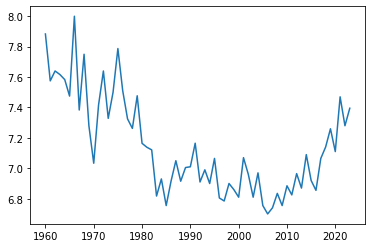

In [13]:
import matplotlib.pyplot as plt
df_agg = df_out.groupby('year').mean()[['vote_average']]

plt.plot(df_agg.index,df_agg.vote_average)
plt.show()

It does seem like the top movies in the 60s-70s were higher rated on average. But notice the "U" shape: there seems to be a dip between 80s-mid 2000s. The top movies have been rated higher up since, so these are good times to be a movie fan.